# Sledovanie negatívnych cien v Holandsku pre rok 2024

In [21]:
# importovanie knižnice pandas
import pandas as pd

Stiahneme si dáta z https://www.energy-charts.info/charts/price_spot_market/chart.htm?l=en&c=NL&interval=year&legendItems=7y5
vymažeme nežiadúce riadky, v našom prípade 1. a 3.
a nahráme do prostredia colab

In [24]:
df = pd.read_excel("/content/energy-charts_Electricity_production_and_spot_prices_the_Netherlands_in_2024.xlsx")
df

,Date (GMT+1),Day Ahead Auction (NL)
0,2024-01-01 00:00:00,0.10
1,2024-01-01 01:00:00,0.01
2,2024-01-01 02:00:00,0.00
3,2024-01-01 03:00:00,-0.01
4,2024-01-01 04:00:00,-0.03
...,...,...
8035,2024-11-30 19:00:00,NaN
8036,2024-11-30 20:00:00,NaN
8037,2024-11-30 21:00:00,NaN
8038,2024-11-30 22:00:00,NaN


Z dataframu odstránime riadky, kde nám chýbajú hodnoty

In [25]:
df.dropna(inplace=True)
df

,Date (GMT+1),Day Ahead Auction (NL)
0,2024-01-01 00:00:00,0.10
1,2024-01-01 01:00:00,0.01
2,2024-01-01 02:00:00,0.00
3,2024-01-01 03:00:00,-0.01
4,2024-01-01 04:00:00,-0.03
...,...,...
8011,2024-11-29 19:00:00,131.87
8012,2024-11-29 20:00:00,119.90
8013,2024-11-29 21:00:00,112.10
8014,2024-11-29 22:00:00,113.93


Pozrieme sa, kedy sa jedná o negatívnu cenu

In [26]:
df['Day Ahead Auction (NL)'] < 0

,Day Ahead Auction (NL)
0,False
1,False
2,False
3,True
4,True
...,...
8011,False
8012,False
8013,False
8014,False


Následne vieme spraviť kumulatívny súčet, koľko krát sa vyskytla negatívna cena




In [27]:
(df['Day Ahead Auction (NL)'] < 0).cumsum()

,Day Ahead Auction (NL)
0,0
1,0
2,0
3,1
4,2
...,...
8011,454
8012,454
8013,454
8014,454


Toto si vieme pridať do pôvodného dataframu, vytvoríme nový stĺpec, kde pridáme kumulatívny počet negatívnych cien



In [28]:
df['Cumulative count of negative prices'] = (df['Day Ahead Auction (NL)'] < 0).cumsum()
df

,Date (GMT+1),Day Ahead Auction (NL),Cumulative count of negative prices
0,2024-01-01 00:00:00,0.10,0
1,2024-01-01 01:00:00,0.01,0
2,2024-01-01 02:00:00,0.00,0
3,2024-01-01 03:00:00,-0.01,1
4,2024-01-01 04:00:00,-0.03,2
...,...,...,...
8011,2024-11-29 19:00:00,131.87,454
8012,2024-11-29 20:00:00,119.90,454
8013,2024-11-29 21:00:00,112.10,454
8014,2024-11-29 22:00:00,113.93,454


In [29]:
# importovanie knižnice matplotlib
import matplotlib.pyplot as plt

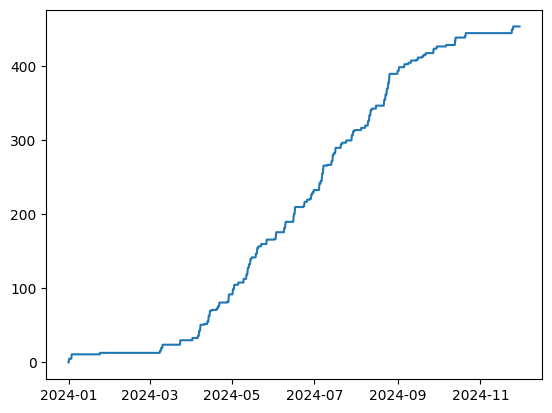

In [30]:
plt.plot(df['Date (GMT+1)'], df['Cumulative count of negative prices'], linestyle='-')
plt.show()